In [152]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib import style
# from mpl_toolkits.mplot3d import Axes3D
import math
from scipy import stats
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [153]:
def extract_h5(file_name):
    f = h5py.File(file_name,'r')
    data=[]
    for key in f.keys():
        group = f[key]
        if key=='y':
            temp=np.asarray(group[()])
            temp=np.reshape(temp,(temp.shape[0],1))
            data.append(temp)
        else:
            data.append(np.asarray(group[()]))
    return data

In [154]:
if (__name__ == "__main__"):
    data=[]
    for i in range(1,6):
        data.append(extract_h5('./q1_datasets/data_'+str(i)+'.h5'))
    print(data[3][0].shape)

(2000, 2)


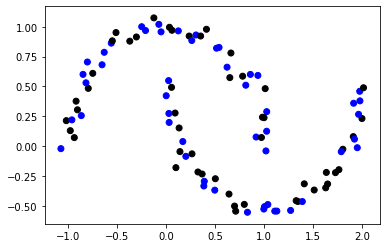

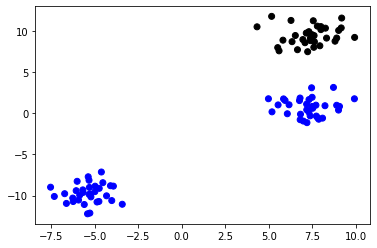

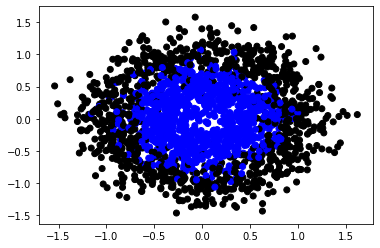

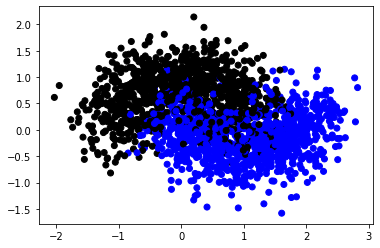

In [155]:
def ploty(x,y):
    cols=[]
    for i in y:
        if i==0:
            cols.append('black')
        else:
            cols.append('blue')
    plt.scatter(x[:,0],x[:,1],c=cols)
    plt.show()
ploty(data[1][0],data[0][1])
ploty(data[2][0],data[2][1])
ploty(data[3][0],data[3][1])
ploty(data[4][0],data[4][1])

In [7]:
# %matplotlib notebook
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# xs=np.square(X[:,0])
# ys=np.square(X[:,1])
# zs=(2)*xs*ys
# ax.scatter(xs, ys, zs,c=cols)


In [8]:
plt.plot(x,y)
plt.show()

NameError: name 'x' is not defined

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


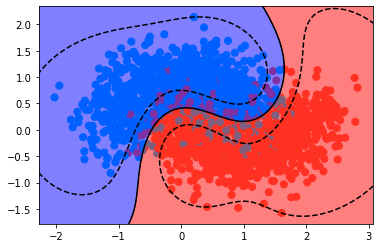

In [9]:
def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[0,2],[1,0]])
    return np.dot(np.dot(X, M), Y.T)
X=data[4][0]
y=data[4][1]
cols=[]
for i in y:
    if i==0:
        cols.append('#00BFFF')
    else:
        cols.append('#FF6347')
plt.scatter(X[:,0], X[:,1],c=cols,s=50)
svc= SVC(kernel='rbf')
svc.fit(X,y.ravel())
clf=svc
# Limit of the axes
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Creating the meshgrid
xx = np.linspace(xlim[0], xlim[1], 200)
yy = np.linspace(ylim[0], ylim[1], 200)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)
# Plotting the boundary only for =-1,=0 and =1.
plt.contourf(XX, YY, Z,levels=[0,float('Inf')],alpha=0.5,colors=['red'])
plt.contourf(XX, YY, Z,levels=[float('-Inf'),0],alpha=0.5,colors=['blue'])
ax.contour(XX,YY, Z, colors='black', levels=[-1, 0, 1],linestyles=['--', '-', '--'])
plt.show()

In [106]:
def seg(X,y):
    postiveX=[]
    negativeX=[]
    for i,v in enumerate(y):
        if v==0:
            negativeX.append(X[i])
        else:
            postiveX.append(X[i])

    #our data dictionary
    return {-1:np.array(negativeX), 1:np.array(postiveX)}
    

In [107]:
temp=seg(data[3][0],data[3][1])
print(len(temp[1]))

1000


In [147]:
z = np.abs(stats.zscore(temp[1]))
k = temp[1][(z < 1.5).all(axis=1)]
z1 = np.abs(stats.zscore(temp[-1]))
k1 = temp[-1][(z1 < 1.5).all(axis=1)]
input=np.append(k,k1,axis=0)
print(input.shape)
output=[1]*len(k)
output0=[0]*len(k1)
output=output+(output0)
output=np.asarray(output).reshape(1578,1)
print(output.shape)
data=[input,output]

# axes.set_xlim([-1.5,1.5])
# axes.set_ylim([-1.5,1.5])
# plt.scatter(k[:,0],k[:,1],c='b')
# plt.scatter(k1[:,0],k1[:,1],c='r')

(1578, 2)
(1578, 1)
2


In [125]:
def iqr(da):
    o=pd.DataFrame(da)
    Q1 = o.quantile(0.25)
    Q3 = o.quantile(0.75)
    IQR = Q3 - Q1
    out = o[~((o < (Q1 - 0.1 * IQR)) |(o > (Q3 + 0.1 * IQR))).any(axis=1)]
    return out

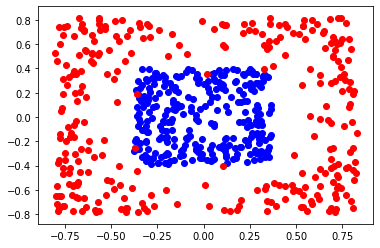

In [126]:
q1=iqr(temp[1])
q2=iqr(temp[-1])
plt.scatter(q1[0],q1[1],c='b')
plt.scatter(q2[0],q2[1],c='r')

In [156]:
def split_data(data):
    split=(int)(4*(len(data[1]))/5)
    x1=np.array(data[0])
    y1=np.array(data[1])
    temp=np.column_stack((x1,y1))
    return (temp[0:split],temp[split:])

In [157]:
train,test=split_data(data[4])

In [167]:
svc= SVC(kernel='rbf')
svc.fit(train[:,0:2],train[:,2].ravel())
y_pred=svc.predict(test[:,0:2])
y_pred.shape

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(400,)

In [165]:
len((svc.support_vectors_))

480

In [188]:
s_v=svc.support_vectors_
coef=svc.dual_coef_[0]
base=svc.intercept_
pred=[]
for i in range(len(test[:,0:2])):
    temp_in=test[:,0:2][i]
    temp_out=test[:,2][i]
    ans=0
    for i in range(len(coef)):
        temp=coef[i]
        ans+=(temp*np.exp(-0.4*np.linalg.norm(s_v[i]-temp_in)**2))
    ans+=base
    if(ans>=0):
            pred.append(1)
    else:
              pred.append(0)
    
pred=np.asarray(pred)
              
        
    
        

In [120]:
def predict1(x,w,b):
        return np.sign(np.dot(x,w.T)+b)

In [121]:
y_pred1=predict1(test[:,0:2],svc.coef_,svc.intercept_)
y_pred1=np.where(y_pred1==-1.,0,1)
y_pred1

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
    

In [174]:
results = confusion_matrix(test[:,2].ravel(),y_pred) 
print(results) 
print ('Accuracy Score :',accuracy_score(test[:,2].ravel(),y_pred))
print ('Report : ')
print (classification_report(test[:,2].ravel(),y_pred) )

[[153  34]
 [ 32 181]]
Accuracy Score : 0.835
Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       187
         1.0       0.84      0.85      0.85       213

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



In [189]:
results = confusion_matrix(test[:,2].ravel(),pred) 
print(results) 
print ('Accuracy Score :',accuracy_score(test[:,2].ravel(),pred))
print ('Report : ')
print (classification_report(test[:,2].ravel(),pred) )

[[152  35]
 [ 30 183]]
Accuracy Score : 0.8375
Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       187
         1.0       0.84      0.86      0.85       213

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

